Importing Requisite Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [ ]:
df = pd.read_csv(r"/content/6.overlap.csv", header = None)

In [ ]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Plotting the datapoints to identify shape

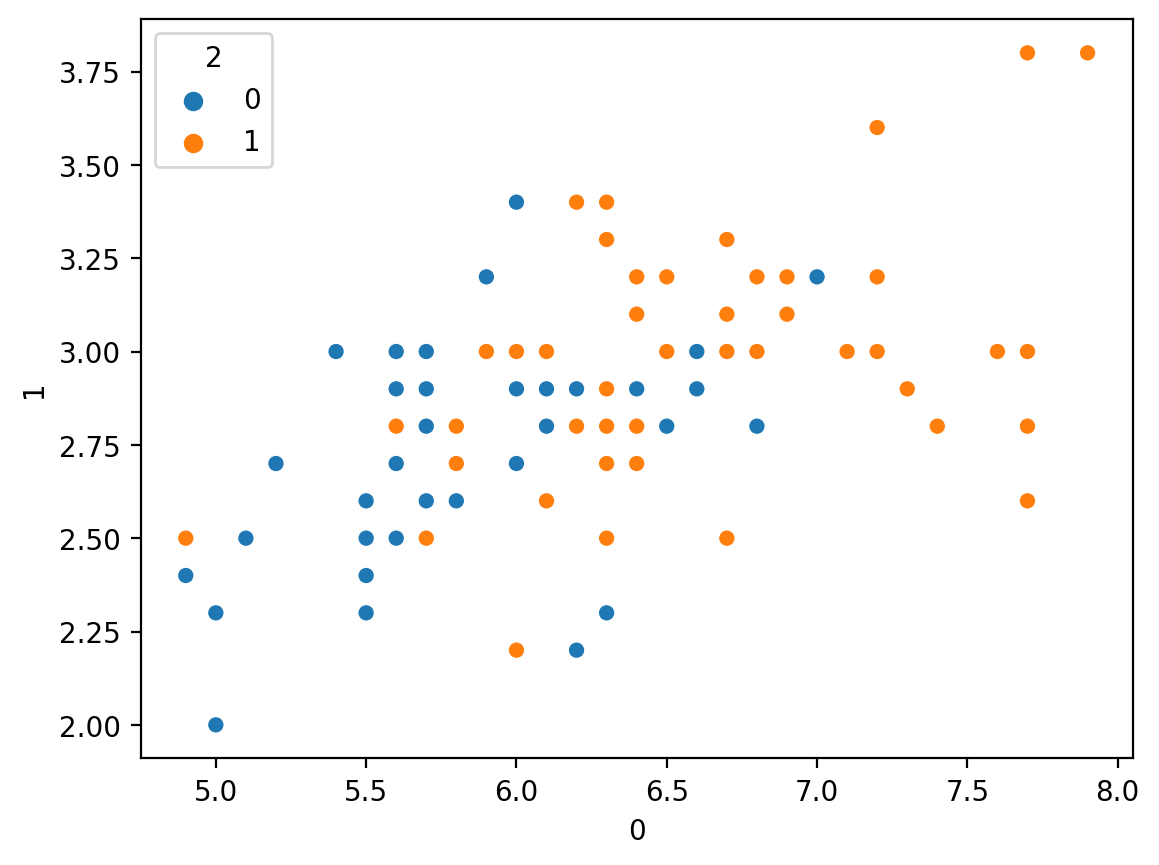

In [ ]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [ ]:
X = df[[0,1]]
y=df[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [ ]:
X_test_trans = std.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer = "he_normal", input_dim = 2))
model.add(Dropout(0.2))
model.add(Dense(9,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                30        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_42 (Dense)            (None, 9)                 99        
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_43 (Dense)            (None, 8)                 80        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_44 (Dense)            (None, 6)                

Model Compilation and Training

In [ ]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans,y_train,epochs = 304 ,validation_split = 0.2 )

Epoch 1/304
2/2 [==============================] - 2s 245ms/step - loss: 0.6948 - accuracy: 0.5312 - val_loss: 0.6863 - val_accuracy: 0.5625
Epoch 2/304
2/2 [==============================] - 0s 37ms/step - loss: 0.7066 - accuracy: 0.5312 - val_loss: 0.6861 - val_accuracy: 0.5625
Epoch 3/304
2/2 [==============================] - 0s 54ms/step - loss: 0.6911 - accuracy: 0.5312 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 4/304
2/2 [==============================] - 0s 55ms/step - loss: 0.6692 - accuracy: 0.5312 - val_loss: 0.6851 - val_accuracy: 0.5625
Epoch 5/304
2/2 [==============================] - 0s 36ms/step - loss: 0.6968 - accuracy: 0.5312 - val_loss: 0.6846 - val_accuracy: 0.5625
Epoch 6/304
2/2 [==============================] - 0s 55ms/step - loss: 0.6745 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.5625
Epoch 7/304
2/2 [==============================] - 0s 37ms/step - loss: 0.6920 - accuracy: 0.4844 - val_loss: 0.6840 - val_accuracy: 0.5625
Epoch 8/304
2/2 [==

MLP Evaluation and Plotting decision surfaces

In [ ]:
Y_cap = model.predict(X_test_trans)

1/1 [==============================] - 0s 105ms/step


In [ ]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [ ]:
Y_cap_f

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.85

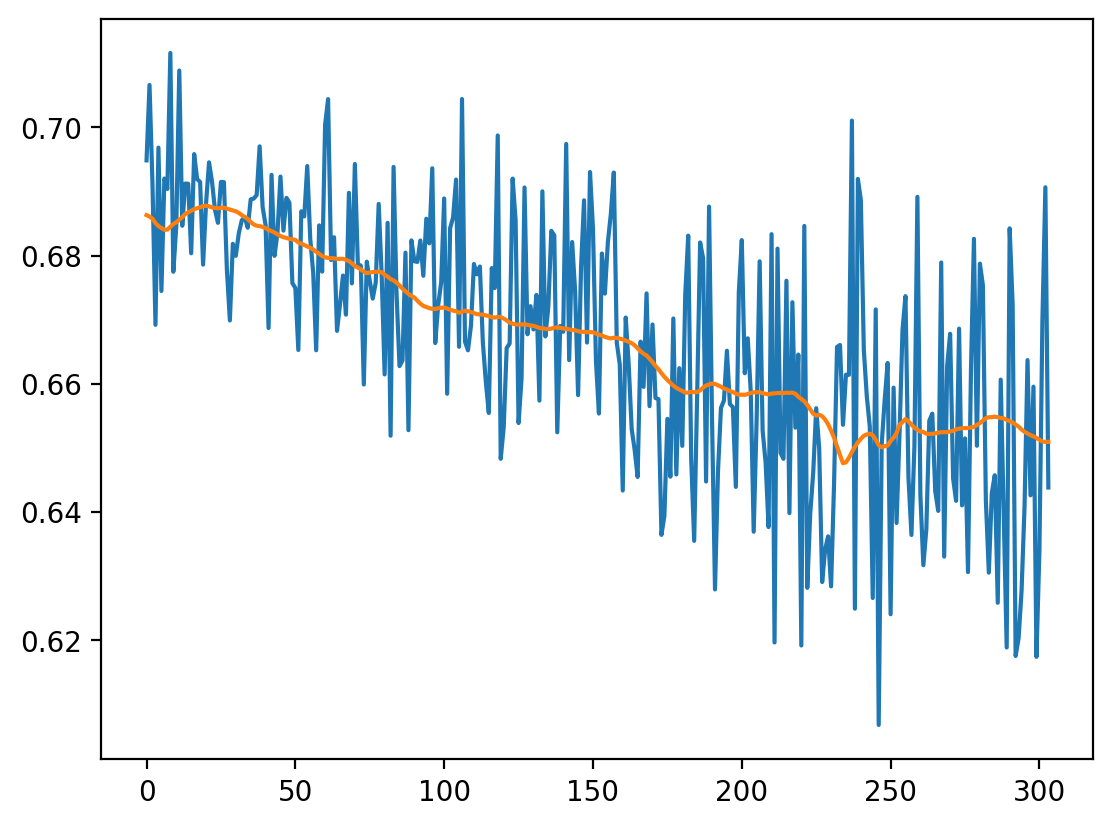

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 24s 3ms/step


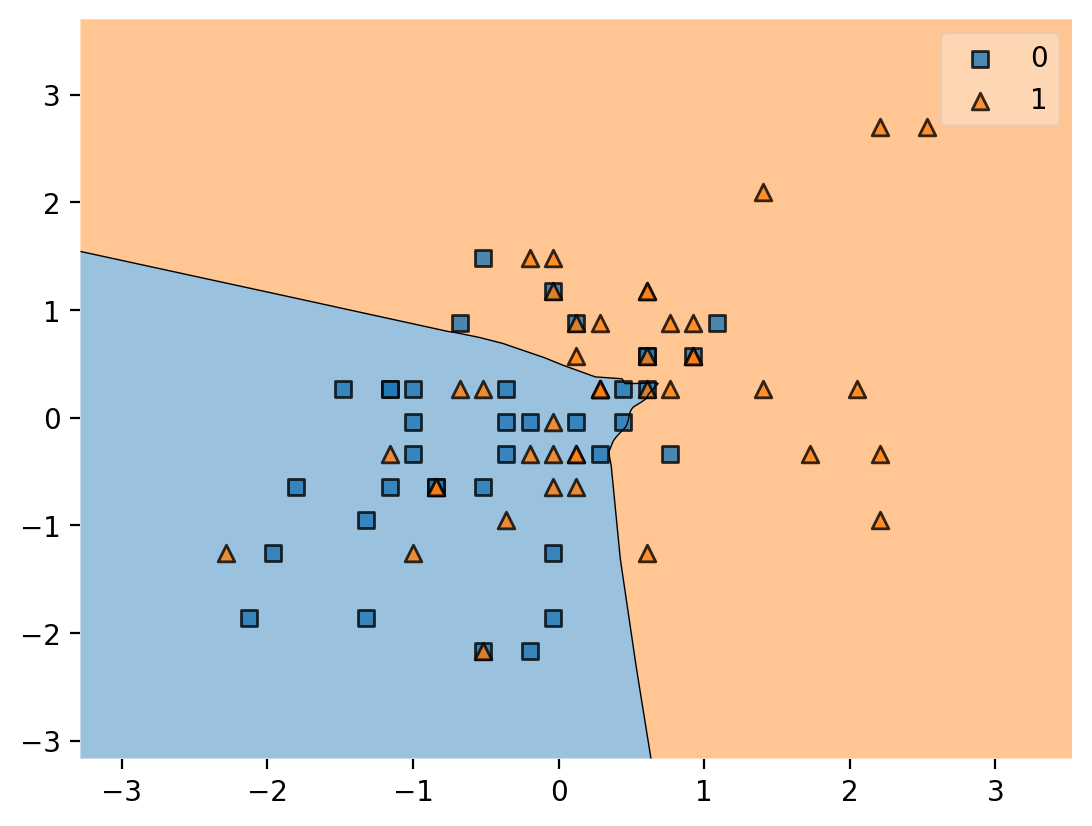

In [ ]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

In [ ]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

7846/9600 [=======================>......] - ETA: 3s